In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset
dataset = pd.read_csv("IOT_Assignment_2_data_regression_sensor_range.csv")

In [3]:
X = dataset.iloc[:, [0,1]].values

In [4]:
Y = dataset.iloc[:, 2].values

In [5]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
model = Sequential()

In [8]:
model.add(Dense(units= 20, activation= 'relu', input_dim = 2))

In [9]:
model.add(Dense(units= 10, activation = 'relu'))

In [10]:
model.add(Dense(units= 1))

In [11]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.7)
print(lr_schedule)
opt = keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(optimizer=opt, loss = 'mean_squared_error')

In [12]:
model.fit(X_train, y_train)

4/4 [==============================] - 1s 3ms/step - loss: 1686.1066


In [13]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


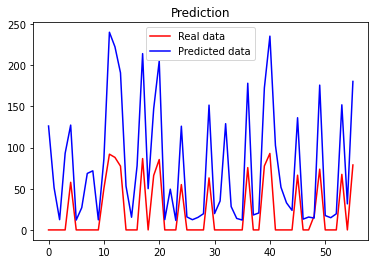

In [14]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()